# Assignment Linear Regression - Assumptions, Verifications

In [1]:
!pip install statsmodels

In [2]:
import pandas as pd 
import numpy as np 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

import statsmodels.api as sm
import matplotlib.pyplot as plt


Assumptions of linear regression are:

#Linearity: The relationship between the dependent and independent variables is linear.
#Independence: The observations are independent of each other.
#Homoscedasticity: The variance of the errors is constant across all levels of the independent variables.
#Normality: The errors follow a normal distribution.
#No multicollinearity: The independent variables are not highly correlated with each other.
#No endogeneity: There is no relationship between the errors and the independent variables.

In [3]:
df=pd.read_csv("Cars.csv")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [4]:
df.shape

(11914, 16)

In [5]:
df_num = df.select_dtypes(include='number')
df_num.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500


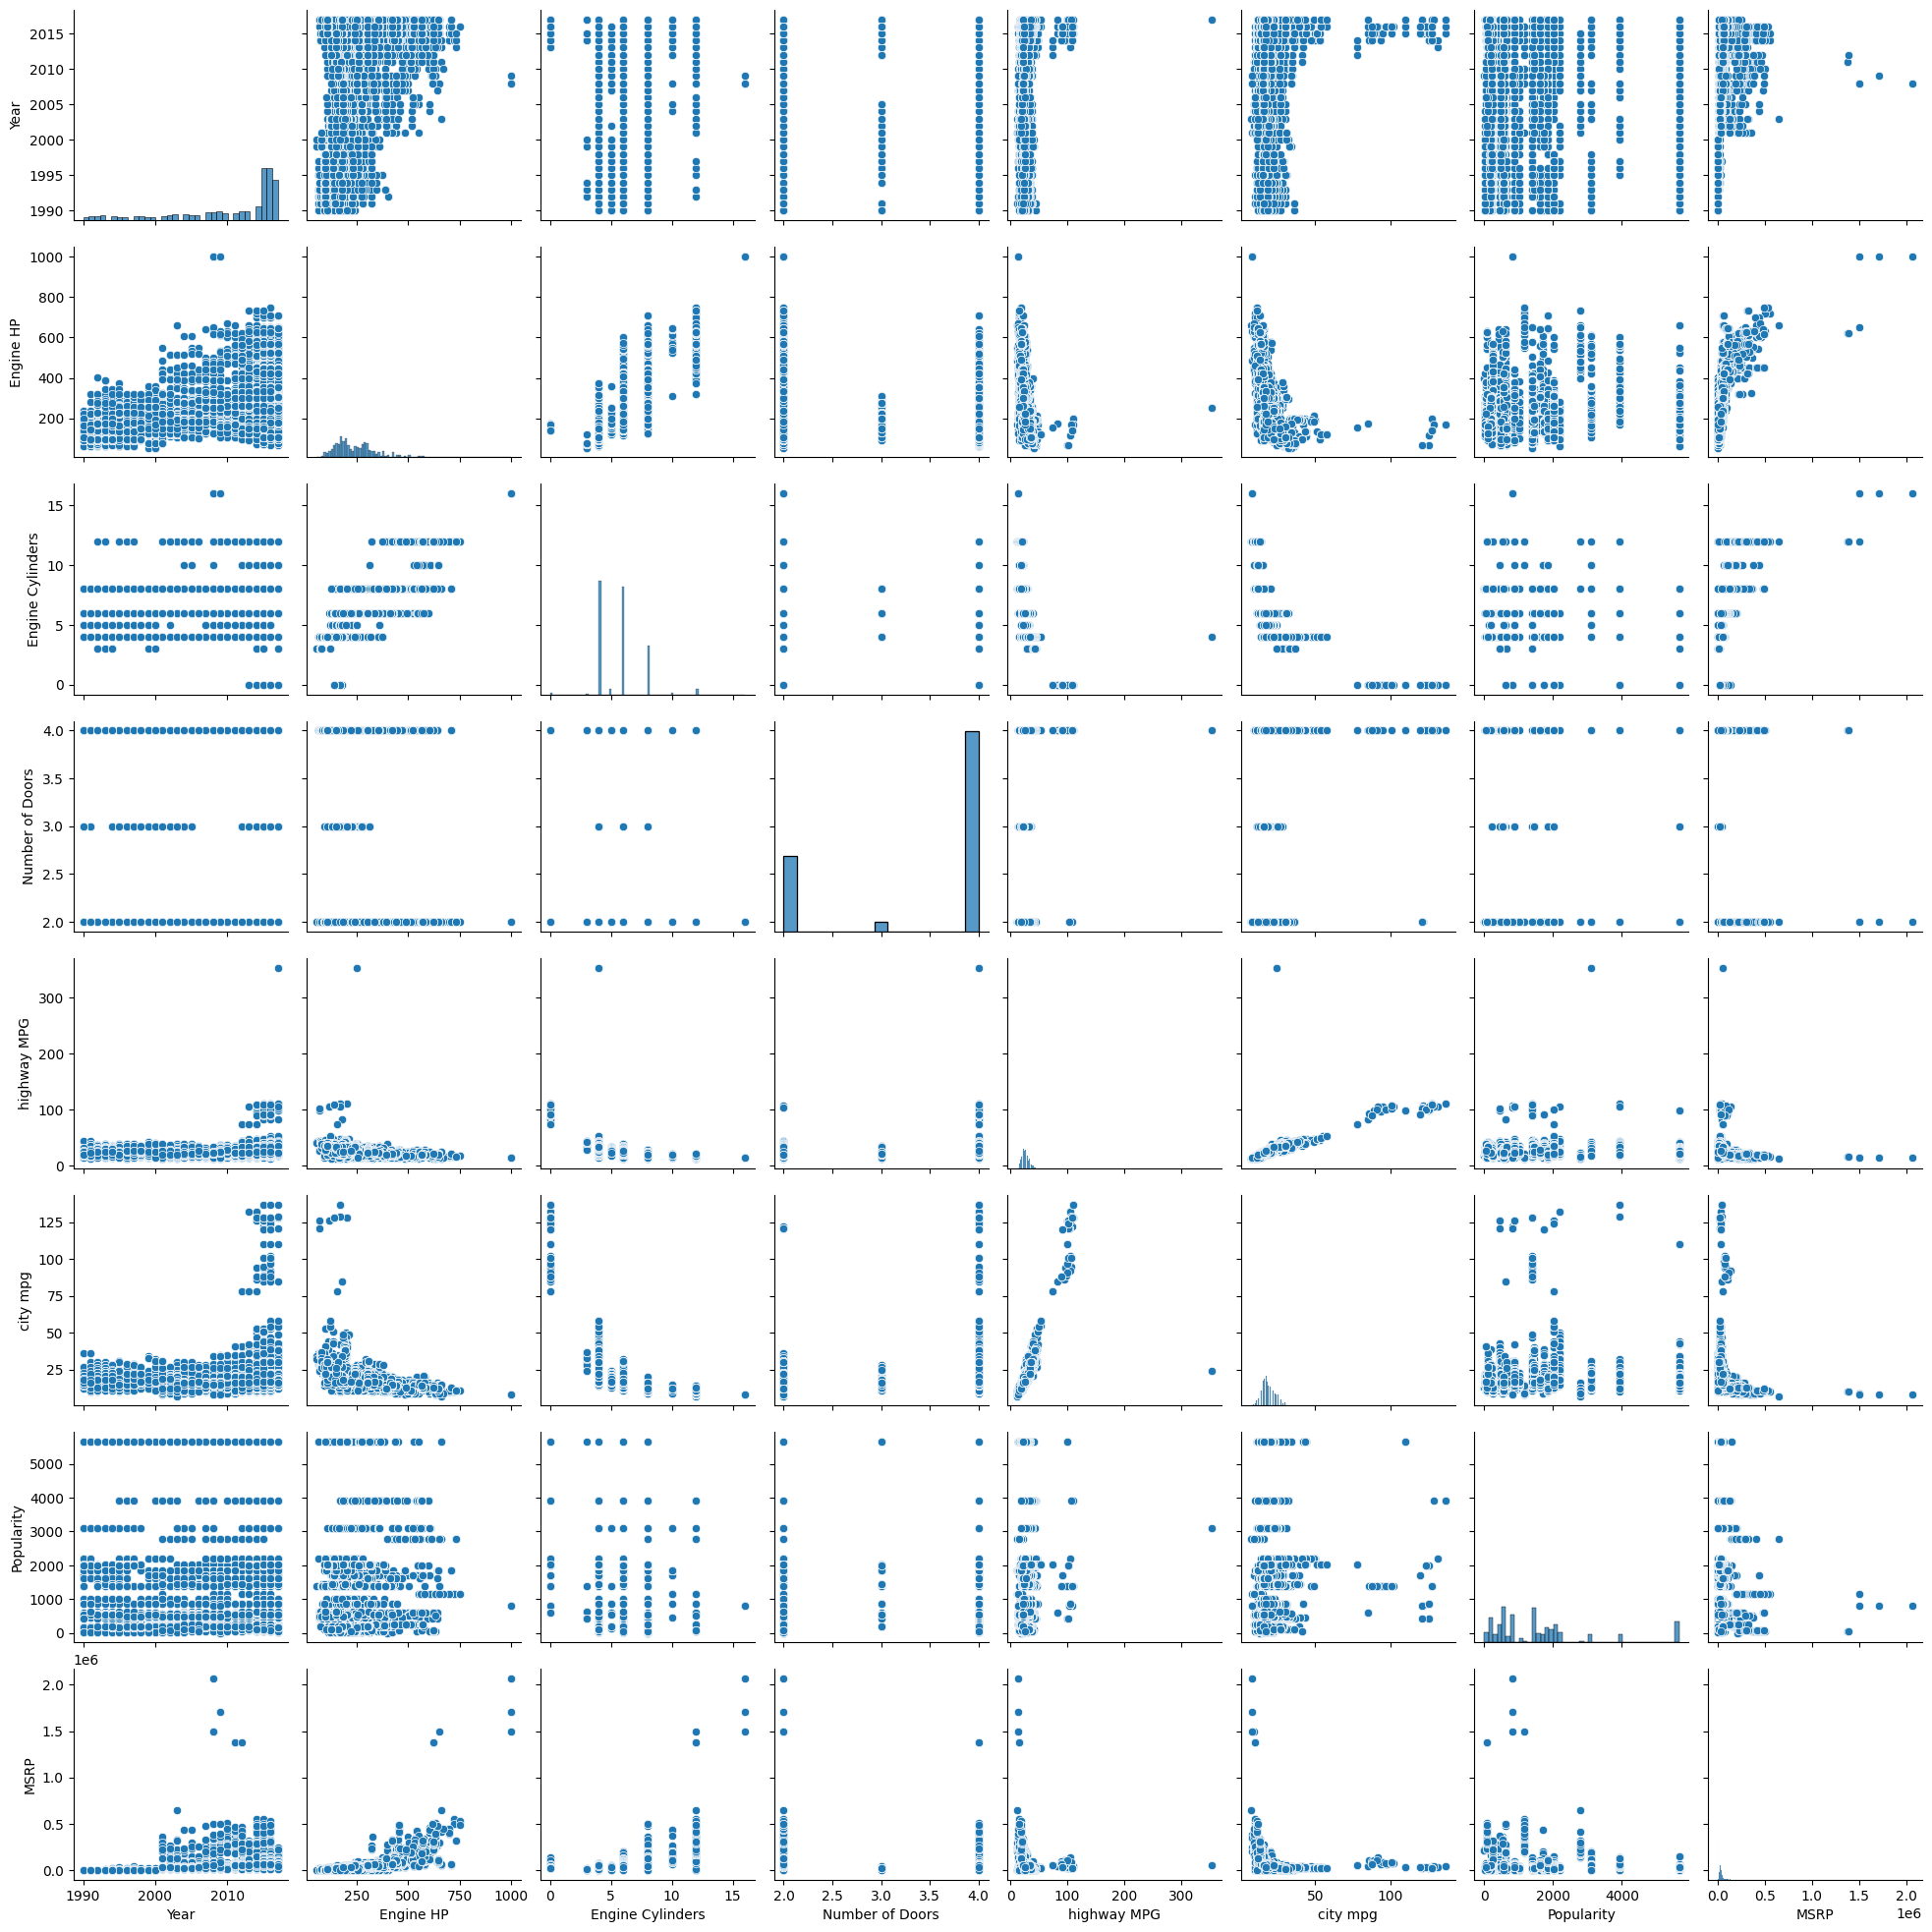

In [20]:
sns.pairplot(df_num, vars=['Year','Engine HP','Engine Cylinders','Number of Doors','highway MPG','city mpg','Popularity','MSRP'])
plt.show()

By looking at the plots we can see that with the MSRP variable the none of the independent variables form an accurately
linear shape. 
So it shows that a linear regression fitting might not be the best model for it.

In [21]:
df=df.dropna()


In [8]:
df.shape

(8084, 16)

In [9]:
X = df.drop('MSRP', axis=1)
y = df.MSRP
X.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916


In [10]:
X_num = X.select_dtypes('number')
X_num.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity
0,2011,335.0,6.0,2.0,26,19,3916
1,2011,300.0,6.0,2.0,28,19,3916
2,2011,300.0,6.0,2.0,28,20,3916
3,2011,230.0,6.0,2.0,28,18,3916
4,2011,230.0,6.0,2.0,28,18,3916


In [11]:
scaler = MinMaxScaler()
X_num_scaler=scaler.fit_transform(X_num)

In [12]:
X_num_scaler = pd.DataFrame(X_num_scaler, columns=X_num.columns, index=X_num.index)

In [13]:
X_num_scaler.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity
count,8084.000000,8084.000000,8084.00000,8084.000000,8084.000000,8084.000000,8084.000000
mean,0.816986,0.232180,0.36113,0.707076,0.042839,0.096567,0.264792
std,0.233999,0.121568,0.11788,0.449043,0.022574,0.055077,0.250019
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.740741,0.144820,0.25000,0.000000,0.029240,0.069231,0.096729
50%,0.925926,0.220930,0.37500,1.000000,0.040936,0.084615,0.178780
75%,0.962963,0.280127,0.37500,1.000000,0.052632,0.115385,0.354907
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [14]:
X = X_num_scaler

In [15]:
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)

Year                0
Engine HP           0
Engine Cylinders    0
Number of Doors     0
highway MPG         0
city mpg            0
Popularity          0
dtype: int64
0
(8084, 7)
(8084,)


In [16]:
### Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)


(6467, 7)
(1617, 7)
(6467,)
(1617,)


In [18]:
bs = pd.concat([X_train, y_train], axis=1).reset_index().drop(['index'], axis=1)
abc = pd.DataFrame({})
for i in range(3):
    sample = bs.iloc[np.random.randint(0,7,5)].reset_index().drop(['index'], axis=1)
    model = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
    abc[f'sample{i}']=model.predict(X_test)
abc

,sample0,sample1,sample2
0,33066.666667,33066.666667,33066.666667
1,30771.666667,30771.666667,30771.666667
2,22273.333333,22273.333333,22273.333333
3,66683.333333,66683.333333,66683.333333
4,53050.000000,53050.000000,53050.000000
...,...,...,...
1612,4809.666667,4809.666667,4809.666667
1613,22280.000000,22280.000000,22280.000000
1614,35563.333333,35563.333333,35563.333333
1615,138666.666667,138666.666667,138666.666667


In [25]:
k_values = np.arange(1, 11, 2)
cv_mape_scores = []
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)
    

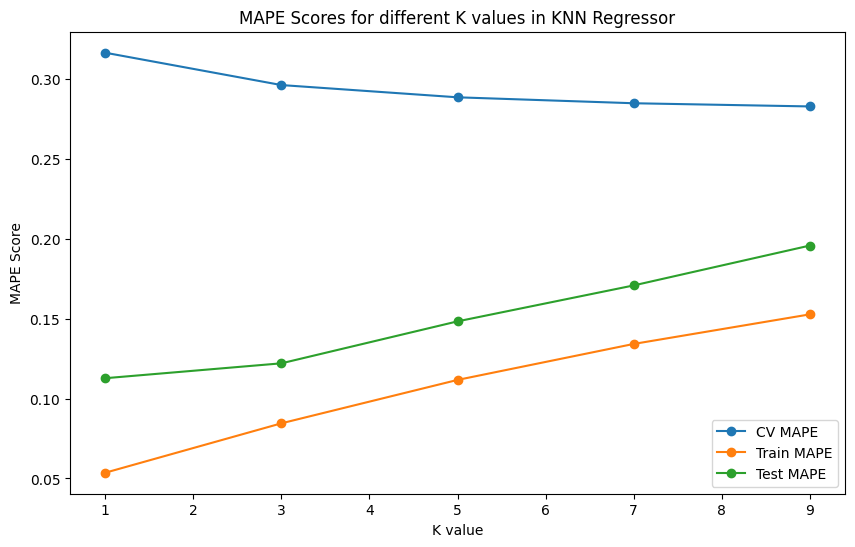

The best K value for CV is 9.


In [26]:
# Plot CV MAPE, Train MAPE, and Test MAPE for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

# Compare the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")

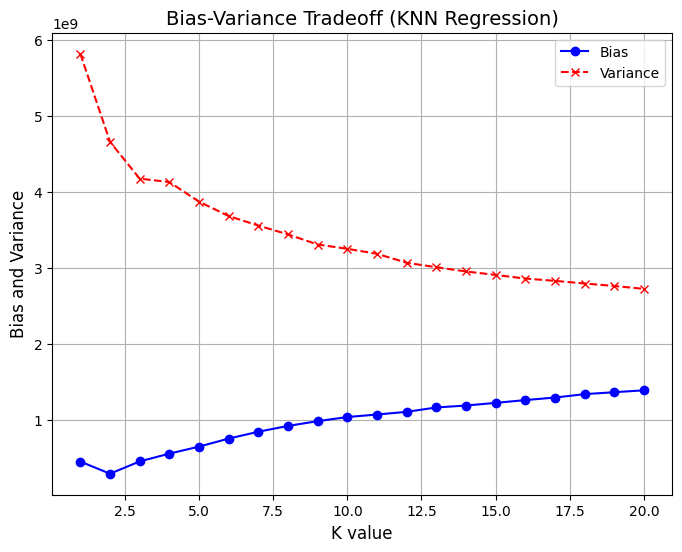

In [27]:

# Calculate bias and variance for KNN regression
k_values = np.arange(1, 21)
bias = []
variance = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)

    # Train the model on the full training set
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)

    # Calculate bias and variance
    bias_value = np.mean((y_train - y_train_pred) ** 2)
    variance_value = np.mean((y_train_pred - np.mean(y_train_pred)) ** 2)
    
    bias.append(bias_value)
    variance.append(variance_value)

# Plot bias and variance for different K values
plt.figure(figsize=(8, 6))
plt.plot(k_values, bias, label='Bias', color='blue', linestyle='-', marker='o')
plt.plot(k_values, variance, label='Variance', color='red', linestyle='--', marker='x')
plt.legend(fontsize=10)
plt.xlabel('K value', fontsize=12)
plt.ylabel('Bias and Variance', fontsize=12)
plt.title('Bias-Variance Tradeoff (KNN Regression)', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()
